In [ ]:
"""SCIMPLE 1.10 examples"""

In [1]:
import scimple1.scimple.scimple as scm

In [2]:
# PySpark
sc, spark = scm.sc_spark()
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [81]:
import re
word_count = sc.textFile('scimple.py').flatMap(lambda line: re.split(r' |:|,|\n|\t|\(|\)|\{|\}|\[|\]|"|\'', line))\
               .filter(lambda word: len(word)!=0)\
               .map(lambda word: (word, 1))\
               .reduceByKey(lambda a,b: a+b).sortBy(lambda pair: pair[1]).collect()

<IPython.core.display.Javascript object>


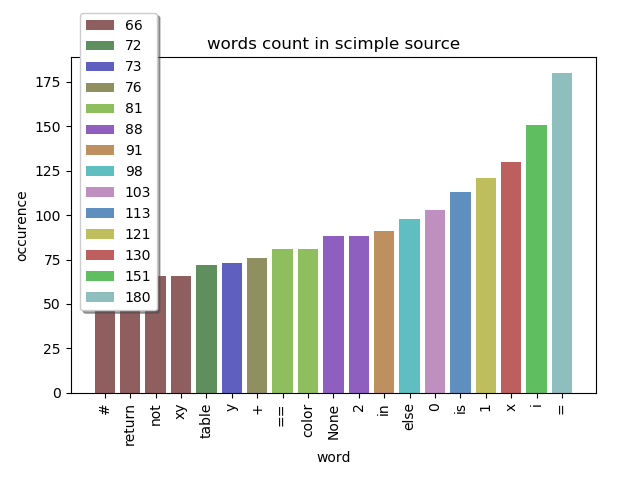

In [82]:
#Data Viz
%matplotlib notebook
scm.Plot(title='words count in scimple source', xlabel='word', ylabel='occurence')\
   .add(word_count[-20:-1], 0, 1, marker='bar', colored_by=1)

In [5]:
#Kafka
scm.Kafka.start(window=5)

In [6]:
scm.Kafka.is_running_scc

False

In [7]:
dstream = scm.Kafka.create_dstream('source_lines', window=5)

In [8]:
rdd_buff = list()
dstream.foreachRDD(lambda rdd: rdd_buff.append(rdd.collect()))

In [9]:
import time
for line in open('scimple.py', 'r').read().split('\n'):
    print('talked :'+line)
    scm.Kafka.talk('source_lines', line)
scm.Kafka.end()

talked :"""
talked :SCIMPLE, Parse and Plot scimply in 2 lines
talked :Maintainer: enzobonnal@gmail.com
talked :"""
talked :import time
talked :import inspect
talked :import math
talked :import os
talked :import random
talked :import re
talked :from collections import Collection, Iterable
talked :from subprocess import Popen, PIPE, TimeoutExpired
talked :import matplotlib.pyplot as plt
talked :import numpy as np
talked :import pandas as pd
talked :from matplotlib import cm
talked :from matplotlib import gridspec
talked :from mpl_toolkits.mplot3d import Axes3D
talked :import logging
talked :_ = Axes3D
talked :
talked :# #####
talked :# ERROR
talked :# #####
talked :
talked :class ScimpleError(Exception):
talked :    """module specific Errors"""
talked :
talked :# #####
talked :# PYSPARK
talked :# #####
talked :_sc = None
talked :_spark = None
talked :
talked :def sc_spark():
talked :    global _sc, _spark
talked :    if _sc:  # spark already running
talked :        return _sc, _spark
ta

talked :                        dict_color_to_lines[color][2] += [z_plot[index]]
talked :                else:
talked :                    if self.__dim == 2:
talked :                        dict_color_to_lines[color] = [[x_plot[index]],
talked :                                                      [y_plot[index]]]
talked :                    else:
talked :                        dict_color_to_lines[color] = [[x_plot[index]],
talked :                                                      [y_plot[index]],
talked :                                                      [z_plot[index]]]
talked :
talked :            for color in dict_color_to_lines:
talked :                if type(label) is dict and color in label:
talked :                    kwargs_plot['label'] = label[color]
talked :                    self.__at_least_one_label_defined = True
talked :                else:
talked :                    kwargs_plot['label'] = None
talked :                if self.__dim == 2:
talked :           

In [15]:
print('\n'.join([key_value[1] for key_value in scm.flatten_n_times(1,rdd_buff)]))

"""
SCIMPLE, Parse and Plot scimply in 2 lines
Maintainer: enzobonnal@gmail.com
"""
import time
import inspect
import math
import os
import random
import re
from collections import Collection, Iterable
from subprocess import Popen, PIPE, TimeoutExpired
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from matplotlib import gridspec
from mpl_toolkits.mplot3d import Axes3D
import logging
_ = Axes3D

# #####
# ERROR
# #####

class ScimpleError(Exception):
    """module specific Errors"""

# #####
# PYSPARK
# #####
_sc = None
_spark = None

def sc_spark():
    global _sc, _spark
    if _sc:  # spark already running
        return _sc, _spark
    try:
        import pyspark
        _sc = pyspark.SparkContext()
        _spark = pyspark.SQLContext(_sc)
    except:
        raise ValueError('pyspark not available')
    return _sc, _spark

# #####
# KAFKA
# #####

class Kafka:
    """
    kafka tools for windows
    KAFKA_HOME can be set (overwritt

In [16]:
# Environment to JSON
name = scm.save_environ()
import os
import json
print(json.load(open(name))['PYTHONPATH'])
os.remove(name)

SUCCESS : Path exported in JSON
c:/Prog/Python/MyLibs;C:/Prog/Python/ScimpleLibraryProject;C:/Prog/Orange/Alexis/Wrapper/wrapper_avec_propositions_Enzo/pyKhiops260418_only_py3;C:/Applications/khiops/python/lib


<IPython.core.display.Javascript object>


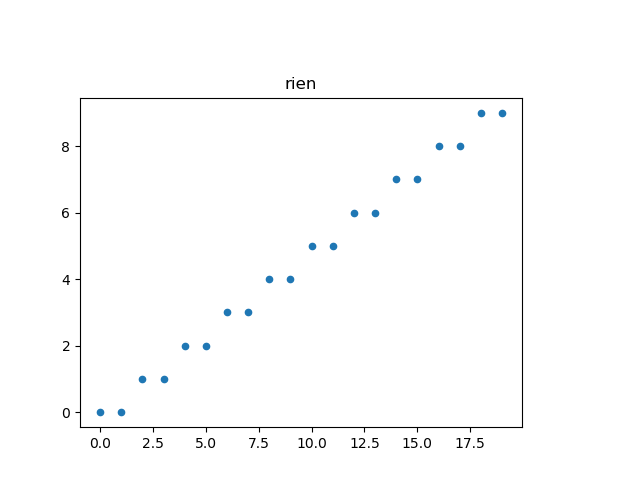

<IPython.core.display.Javascript object>


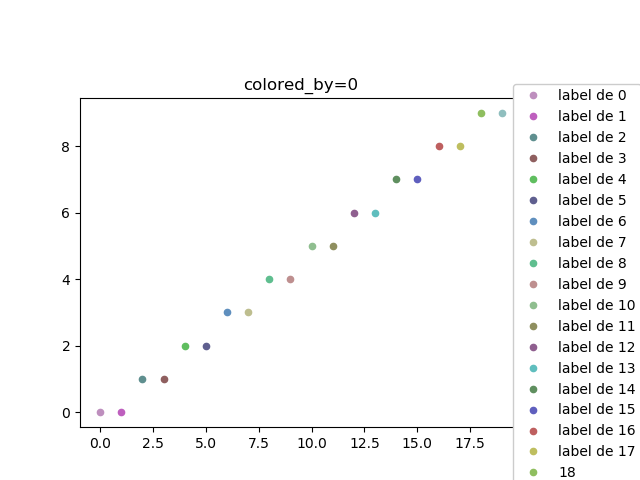

<IPython.core.display.Javascript object>


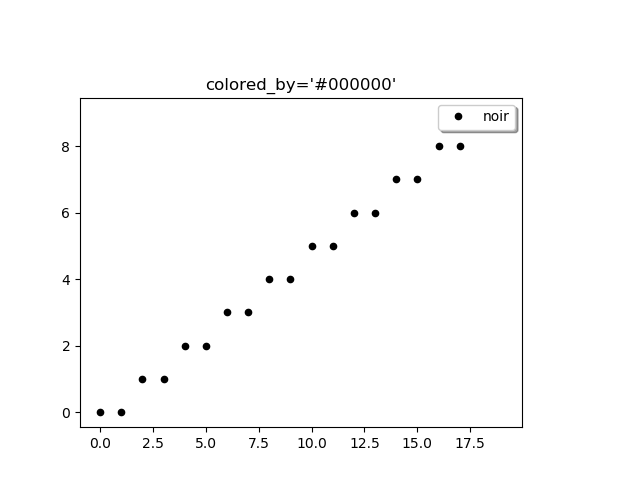

<IPython.core.display.Javascript object>


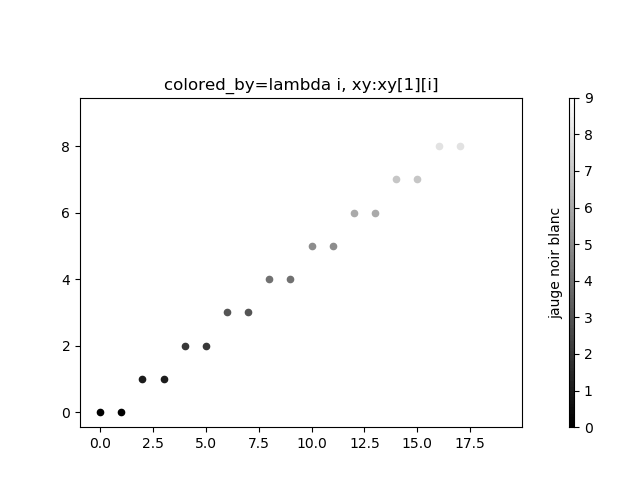

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


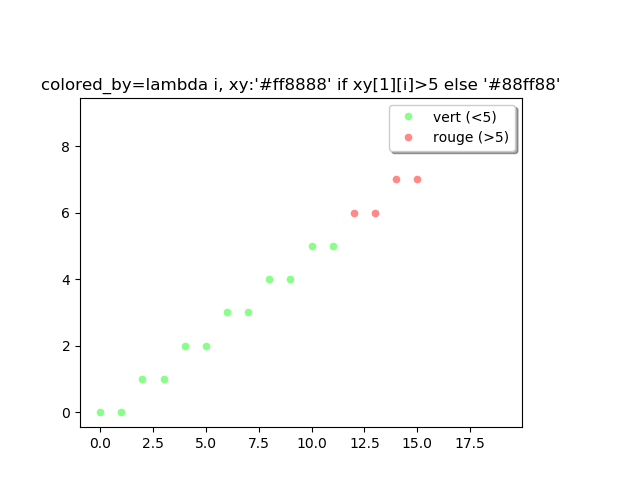

<IPython.core.display.Javascript object>


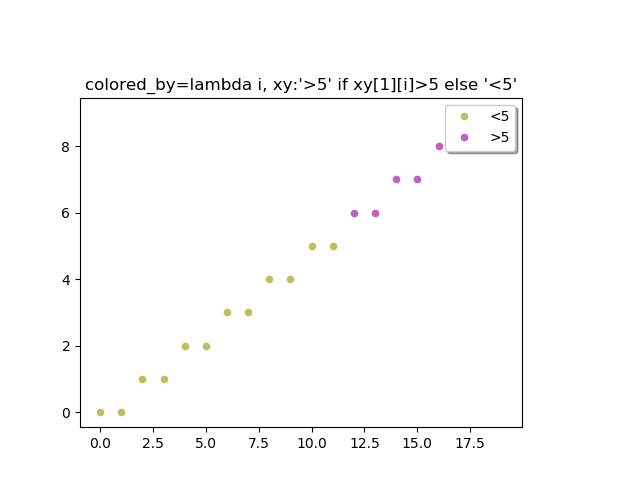

In [30]:
%matplotlib notebook
tab=[[i,i//2] for i in range(20)]
scm.Plot(title="rien").add(tab, 0, 1)
scm.Plot(title="colored_by=0").add(tab, 0, 1, colored_by=0,
                               label={str(i):'label de '+str(i) for i in range(18)})
scm.Plot(title="colored_by='#000000'").add(tab, 0, 1, colored_by='#000000',
                                       label="noir")
scm.Plot(title="colored_by=lambda i, xy:xy[1][i]")\
    .add(tab, 0, 1, colored_by=lambda i, xy:xy[1][i],
         label="jauge noir blanc")
scm.Plot(title="colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88'")\
    .add(tab, 0, 1, colored_by=lambda i, xy:'#ff8888' if xy[1][i]>5 else '#88ff88',
         label={'#ff8888' :"rouge (>5)", '#88ff88': "vert (<5)"})
scm.Plot(title="colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5'")\
    .add(tab, 0, 1, colored_by=lambda i, xy:'>5' if xy[1][i]>5 else '<5')

In [83]:
from scimple1.scimple.scimple import Plot, get_sample, xgrid, ygrid
import pandas as pd
import math
import random
tab = get_sample('xyz', pd.DataFrame)

tab.columns = ['atom', 'x', 'y', 'z']
charges = get_sample('charges')


<IPython.core.display.Javascript object>


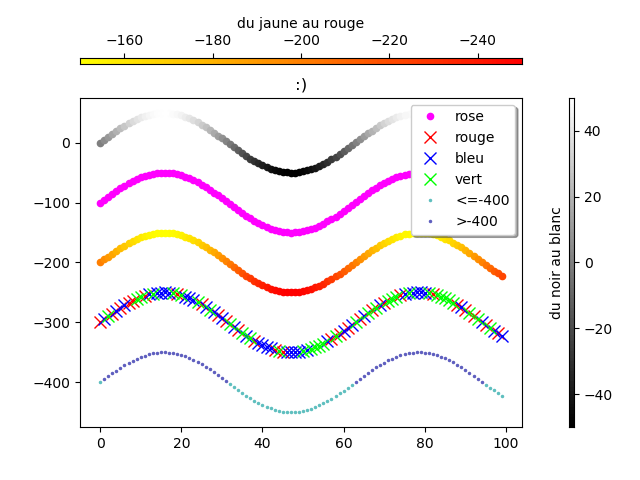

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [84]:
Plot(2, title=':)').add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10),
                        marker='.', colored_by=lambda i, xy: xy[1][i], label='du noir au blanc') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 100,
         marker='.', colored_by='#ff00ff', label='rose') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 200,
         marker='.', colored_by=lambda i, xy: xy[1][i], label='du jaune au rouge') \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 300,
         marker='x', colored_by=lambda i, xy: ['#ff0000', '#00ff00', '#0000ff'][int(xy[1][i]) % 3],
         label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'}) \
    .add(x=range(100), y=lambda i, x: 50 * math.sin(x[i] / 10) - 400,
         marker='.', markersize=3,
         colored_by=lambda i, xy: '>-400' if xy[1][i] > -400 else '<=-400')

<IPython.core.display.Javascript object>


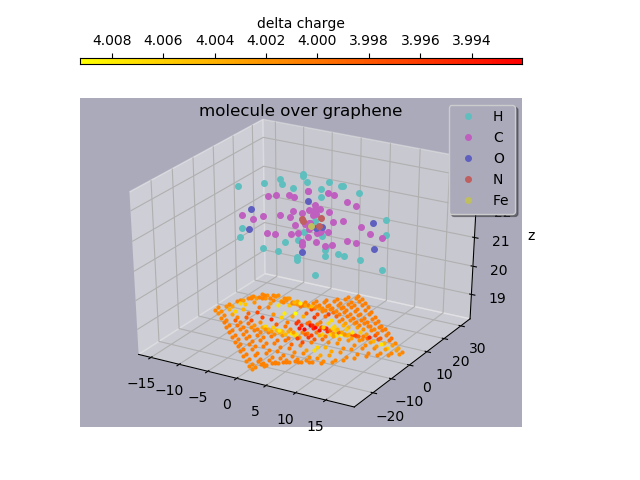

No handles with labels found to put in legend.


In [85]:
Plot(3, zlabel='z', bg_color='#aaaabb', title="molecule over graphene").magic('invert_color_bars') \
    .add(tab, 'x', 'y', 'z', first_line=101, markersize=4, marker='.',
         colored_by=lambda i, _: sum(charges[101 + i]), label='delta charge') \
    .add(tab, 'x', 'y', 'z', last_line=100
         , markersize=4, marker='o', colored_by='atom')

<IPython.core.display.Javascript object>


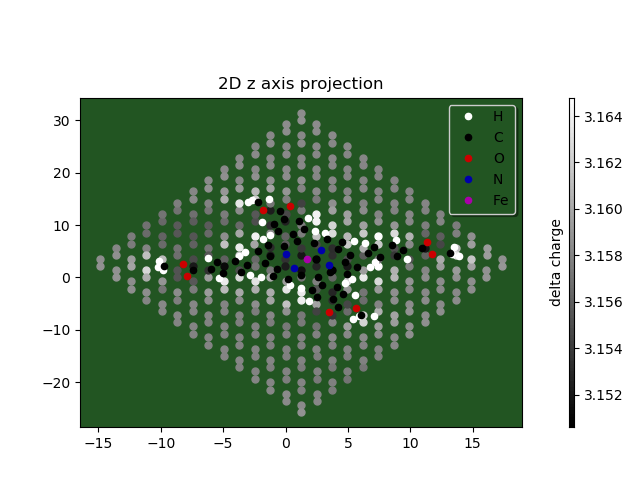

No handles with labels found to put in legend.


In [86]:
dict_atoms_colors={'H': '#ffffff', 'C':'#000000', 'N':'#0000aa', 'O':'#cc0000', 'Fe':'#aa00aa'}
dict_colors_atoms={c: a for a, c in dict_atoms_colors.items()}
Plot(2, bg_color='#225522', title="2D z axis projection") \
    .add(tab, 'x', 'y', first_line=101, markersize=10, marker='.',
         colored_by=lambda i, _: sum(charges[101 + i][1:]), label='delta charge')\
    .add(tab, 'x', 'y', last_line=100, colored_by=lambda i, xy: dict_atoms_colors[tab['atom'][i]], marker='.',
        label=dict_colors_atoms)

<IPython.core.display.Javascript object>


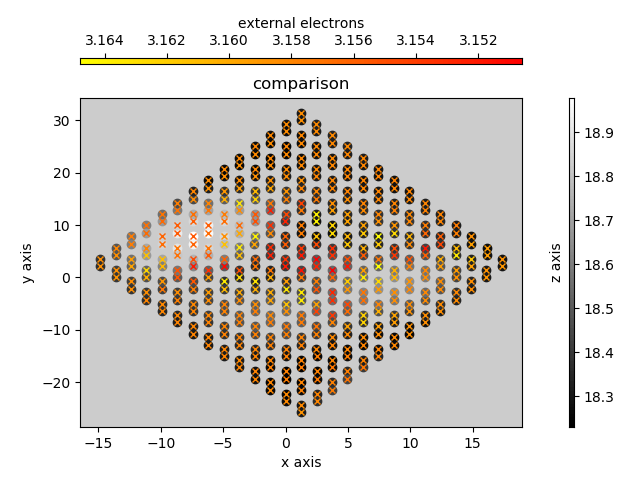

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [87]:
Plot(2, bg_color='#cccccc', xlabel="x axis", ylabel="y axis", title="comparison") \
    .add(tab, 'x', 'y', first_line=101, markersize=6, marker='o',
         colored_by=lambda i, _: tab['z'][101 + i],
         label="z axis") \
    .add(tab, 'x', 'y', first_line=101, markersize=4, marker='x',
         colored_by=lambda i, _: sum(charges[101 + i][1:]),
         label="external electrons")

<IPython.core.display.Javascript object>


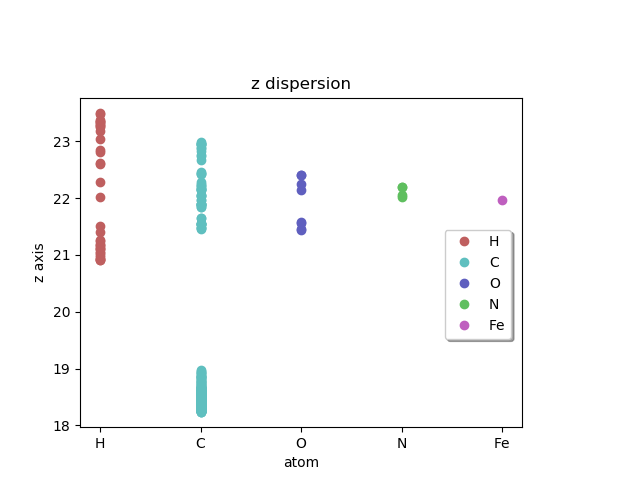

In [88]:
Plot(2, xlabel="atom", ylabel="z axis", title="z dispersion") \
    .add(tab, 'atom', 'z', markersize=6, marker='o', colored_by='atom')

<IPython.core.display.Javascript object>


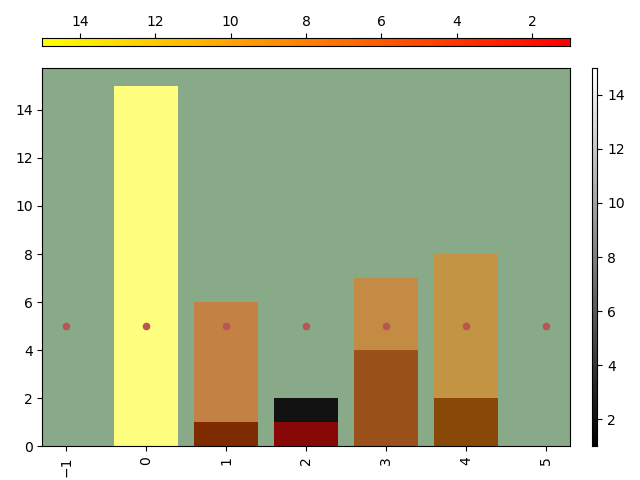

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [89]:
Plot(2, bg_color="#88aa88").add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
                                colored_by=lambda i, xy: xy[1][i]) \
    .add(x=range(5), y=[15] + [random.randint(1, 10) for _ in range(4)], marker='bar',
         colored_by=lambda i, xy: xy[1][i], markersize=0.5) \
    .add(x=range(-1, 6), y=[5] * 7, colored_by='#bb5555')

<IPython.core.display.Javascript object>


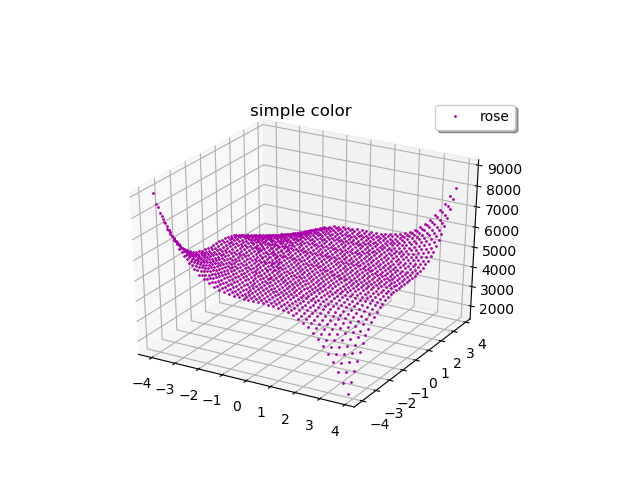

In [90]:
Plot(3, title='simple color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 5000,
         marker='.', colored_by='#aa00aa', label='rose', markersize=2) 

<IPython.core.display.Javascript object>


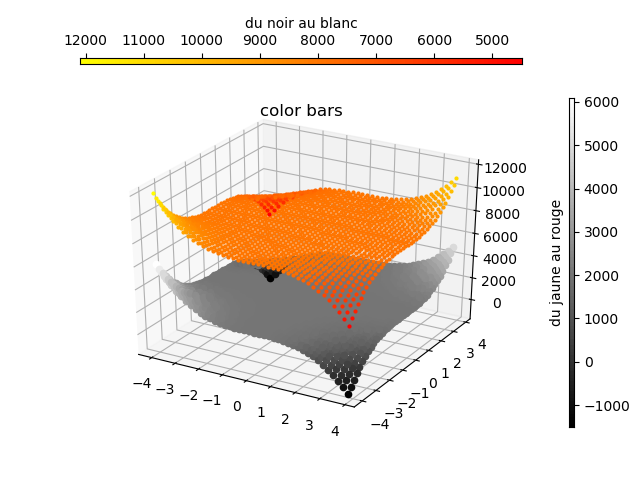

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [91]:
Plot(3, title='color bars')\
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 + 2000,
         marker='.', colored_by=lambda i, xy: xy[2][i], label='du jaune au rouge') \
    .add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2),
                        z=lambda i, x, y: (x[i] * y[i]) ** 3 + 8000,
                        marker='o', colored_by=lambda i, xy: xy[2][i], label='du noir au blanc', markersize=2) 

<IPython.core.display.Javascript object>


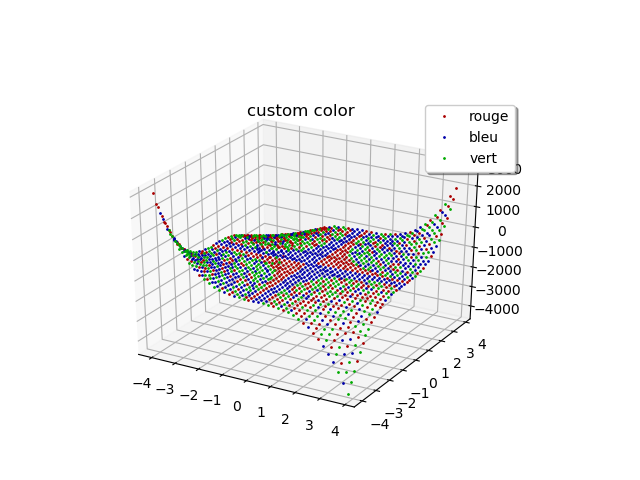

In [92]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 1000,
         marker='.', colored_by=lambda i, xy: ['#aa0000', '#00aa00', '#0000aa'][int(xy[2][i]) % 3],
         label={'#aa0000': 'rouge', '#00aa00': 'vert', '#0000aa': 'bleu'}, markersize=2) 

<IPython.core.display.Javascript object>


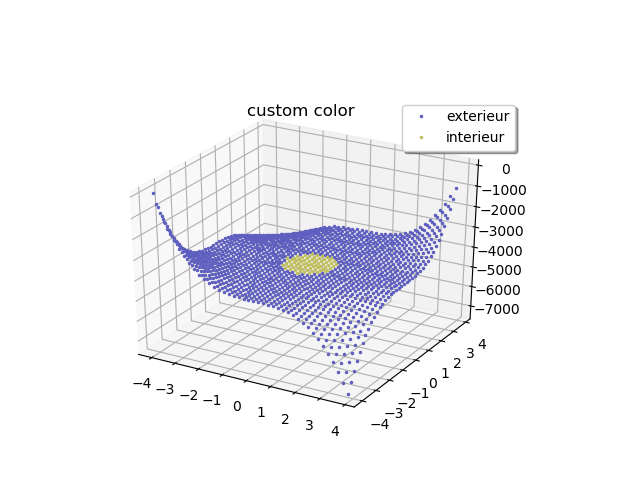

In [93]:
Plot(3, title='custom color').add(x=xgrid(-4, 4, 0.2), y=ygrid(-4, 4, 0.2), z=lambda i, x, y: (x[i] * y[i]) ** 3 - 4000,
         marker='.', markersize=3,
         colored_by=lambda i, xy: 'exterieur' if math.sqrt(xy[0][i] ** 2 + xy[1][i] ** 2) > 1 else 'interieur')